# Метрики качества в задачах регрессии

# Sklearn

## sklearn.metrics

Модуль sklearn.metrics предоставляет нам готовую реализацию большинства метрик, использующихся в задачах классификации и регрессии. По приведенной ссылке вы можете ознакомиться с полным набором доступных метрик. Рассмотрим наиболее популярные.

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [8]:
# Для начала мы импортируем все необходимые модули
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

### Генерация датасетов

Сгенерируем данные. Воспользуемся функцией **make_regression**. Сгенеруем датасет, состоящие из двух признаков (удобно визуализировать). Для задачи регрессии мы будем использовать датасет, в котором информативным является только один признак. В данном случае строим объекты в координатах признак– целевая функция, то есть красным цветом у нас обозначены объекты, построенные в координатах первый признак–target, синим цветом те же самые объекты построены в координатах нулевой признак–target. 

In [10]:
data, target = datasets.make_regression(n_features = 2, n_informative = 1, 
                                        n_targets = 1, 
                                        noise = 5., random_state = 7)

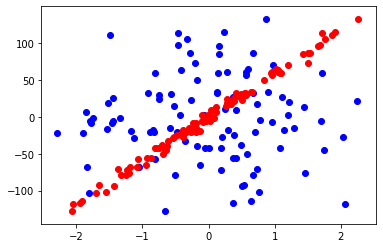

In [11]:
X0 = data[:, 0]
X1 = data[:, 1]

plt.scatter(X0, target, color = 'b')
plt.scatter(X1, target, color = 'r')

Мы вот видим, что первый признак является информативным, нулевой — шумовой. Итак, теперь данные мы сгенерировали, нам остается разбить их на обучение и тест.

In [12]:
train_data, test_data, train_labels, test_labels = train_test_split(data, 
                                                    target, test_size = 0.3, 
                                                    random_state = 1)

#### Обучение регрессионной модели 

Построим SGD-регрессорор — это также метод регрессии, основанный на стохастическом градиентном спуске. Обучим модель и сгенерируем предсказания. 

In [24]:
regressor = linear_model.SGDRegressor(random_state=1, max_iter=20)
regressor.fit(train_data, train_labels)
predictions = regressor.predict(test_data)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Для начала выведем правильные метки, а потом - предсказания в виде меток.

In [25]:
print(test_labels)

[   2.67799047    7.06525927  -56.43389936   10.08001896  -22.46817716
  -19.27471232   59.44372825  -21.60494574   32.54682713  -41.89798772
  -18.16390935   32.75688783   31.04095773    2.39589626   -5.04783924
  -70.20925097   86.69034305   18.50402992   32.31573461 -101.81138022
   15.14628858   29.49813932   97.282674     25.88034991  -41.63332253
  -92.11198201   86.7177122     2.13250832  -20.24967575  -27.32511755]


In [26]:
print(predictions)

[ -1.46503565   5.75776789 -50.13234306   5.05646094 -24.09370893
  -8.34831546  61.77254998 -21.98350565  30.65112022 -39.25972497
 -17.19337022  30.94178225  26.98820076  -6.08321732  -3.46551
 -78.9843398   84.80190097  14.80638314  22.91302375 -89.63572717
  14.5954632   31.64431951  95.81031534  21.5037679  -43.1101736
 -95.06972123  86.70086546   0.47837761 -16.44594704 -22.72581879]


Мы видим, что правильные значения нашей функции не везде совпадаю с приближенными значениями. Теперь их нужно оценивать. 

#### mean absolute error

Первая метрика — это *mean absolute error*, средняя ошибка предсказаний. Давайте ее посчитаем. 

In [28]:
metrics.mean_absolute_error(test_labels, predictions)

3.748761311885298

Видим, что в среднем мы ошибаемся на 3,7. В качестве аргументов метрики передаем предсказанные значения, истинные значения, и считаем.

#### mean squared error

Помимо абсолютных отклонений можно посчитать так называемую MSE-метрику, или *mean squared error* — это среднеквадратичное отклонение. Запустим. 

In [30]:
metrics.mean_squared_error(test_labels, predictions)

24.114925597460914

Видим, что среднеквадратичное отклонение равно 24. 

#### root mean squared error

Часто вместо среднеквадратичного отклонения используют корень из среднеквадратичного отклонения. Ну, его получить очень просто — достаточно посчитать среднеквадратичное отклонение с помощью той же самой функции и просто взять у него корень.

In [34]:
metrics.mean_squared_error(test_labels, predictions)**0.5

4.91069502183356

Получаем оценку 4,9. 

#### r2 score

Последняя метрика, про которую хотелось бы сказать — это коэффициент детерминации, или *r2 score*. Для того чтобы ее посчитать, нужно вызвать функцию **r2_score** и передать ей на вход наши предсказания и правильные значения функции. 

In [36]:
metrics.r2_score(test_labels, predictions)

0.989317615054695

И видим, что значение довольно высокое — 0,99.